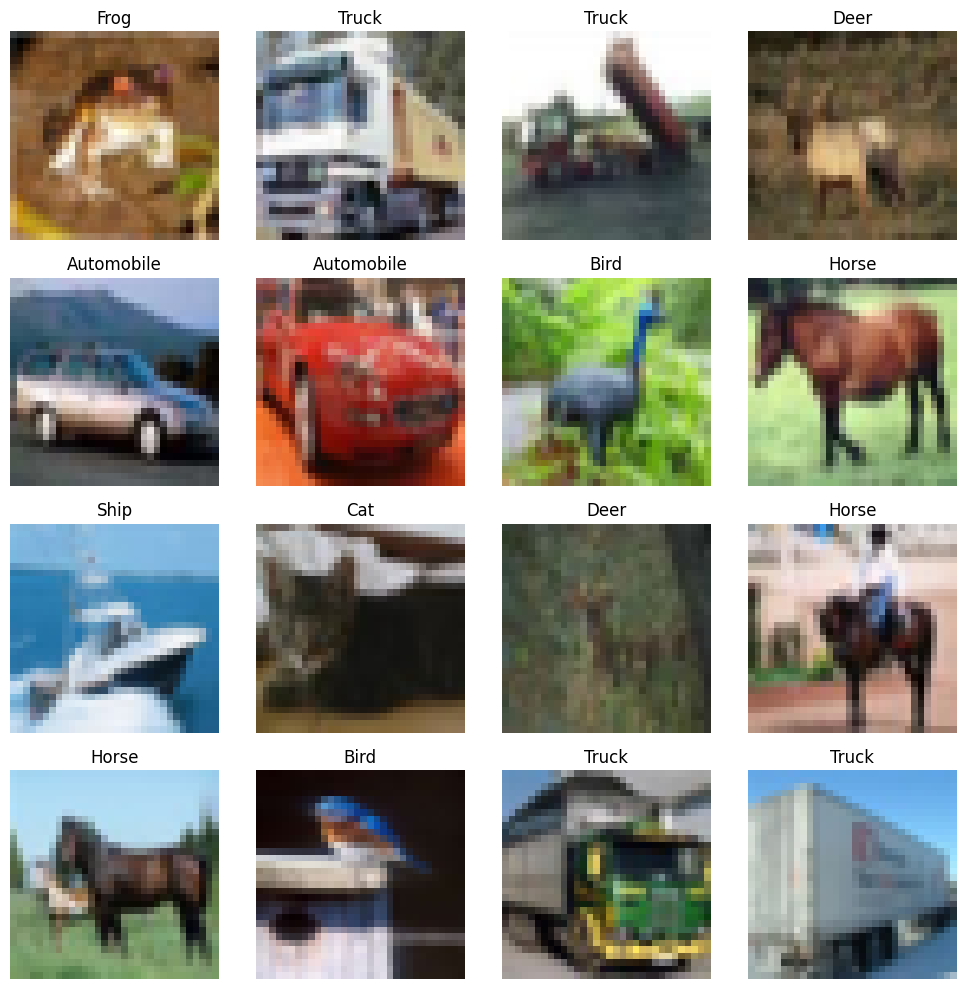

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define class labels for CIFAR-10 dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Normalize the image data 
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Plotting a subset of images
def plot_cifar_images(images, labels, class_names, num_rows=4, num_cols=4):
    plt.figure(figsize=(10, 10))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize first 16 images from the CIFAR-10 training dataset
plot_cifar_images(x_train, y_train, class_names)


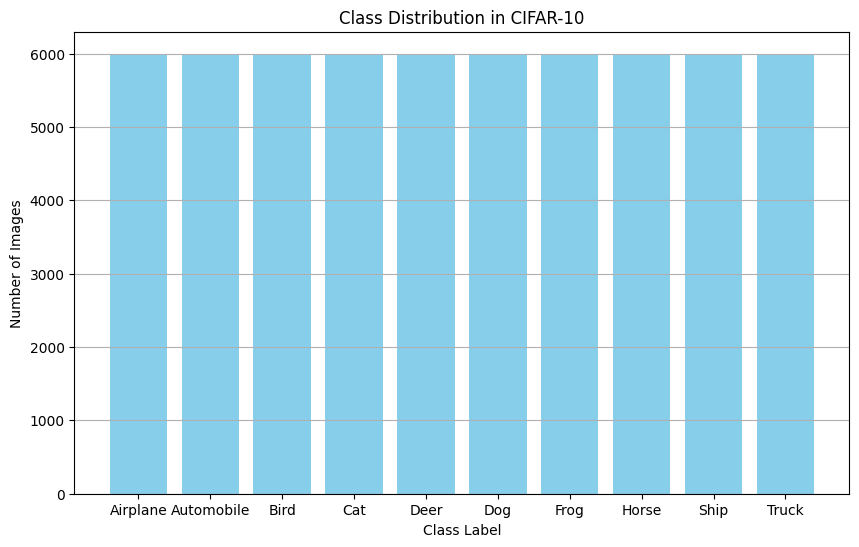

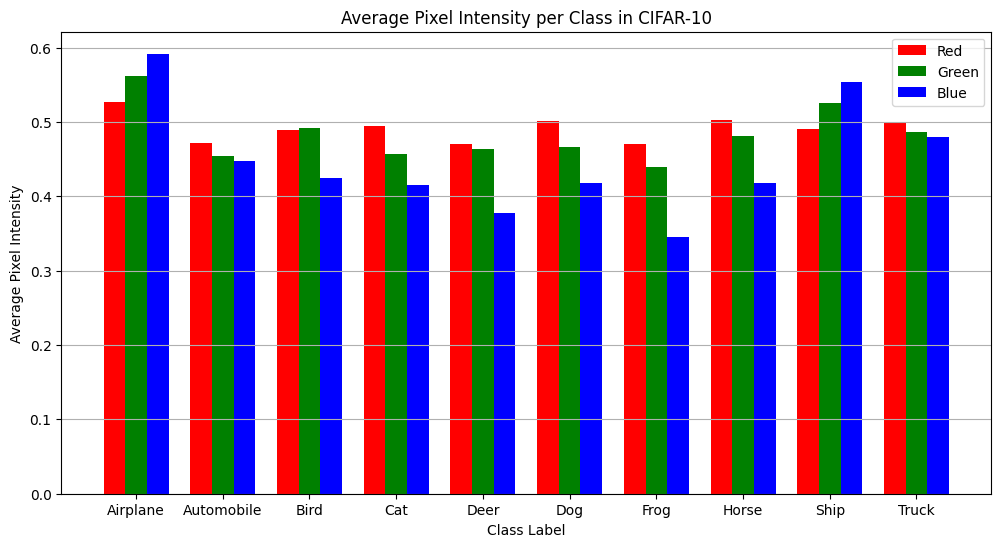

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine train and test data for analysis
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0).flatten()

# Normalize the image data
x_data = x_data.astype('float32') / 255.0

# 1. Class Distribution Bar Graph
def plot_class_distribution(labels):
    class_counts = np.bincount(labels)
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(10), class_counts, color='skyblue')
    plt.title('Class Distribution in CIFAR-10')
    plt.xlabel('Class Label')
    plt.ylabel('Number of Images')
    plt.xticks(range(10), ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                            'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
    plt.grid(axis='y')
    plt.show()

# Plot Class Distribution
plot_class_distribution(y_data)

# 2. Average Pixel Intensity per Class Bar Graph
def plot_average_pixel_intensity(images, labels):
    avg_pixel_values = np.array([images[labels == cls].mean(axis=(0, 1, 2)) for cls in range(10)])
    
    # Prepare data for bar plot
    avg_red = avg_pixel_values[:, 0]
    avg_green = avg_pixel_values[:, 1]
    avg_blue = avg_pixel_values[:, 2]
    
    # Bar graph data
    x = np.arange(10)  # Class labels
    width = 0.25  # Width of bars

    plt.figure(figsize=(12, 6))
    plt.bar(x - width, avg_red, width, label='Red', color='red')
    plt.bar(x, avg_green, width, label='Green', color='green')
    plt.bar(x + width, avg_blue, width, label='Blue', color='blue')
    
    plt.title('Average Pixel Intensity per Class in CIFAR-10')
    plt.xlabel('Class Label')
    plt.ylabel('Average Pixel Intensity')
    plt.xticks(x, ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
    plt.legend()
    plt.grid(axis='y')
    plt.show()

# Plot Average Pixel Intensity per Class
plot_average_pixel_intensity(x_data, y_data)


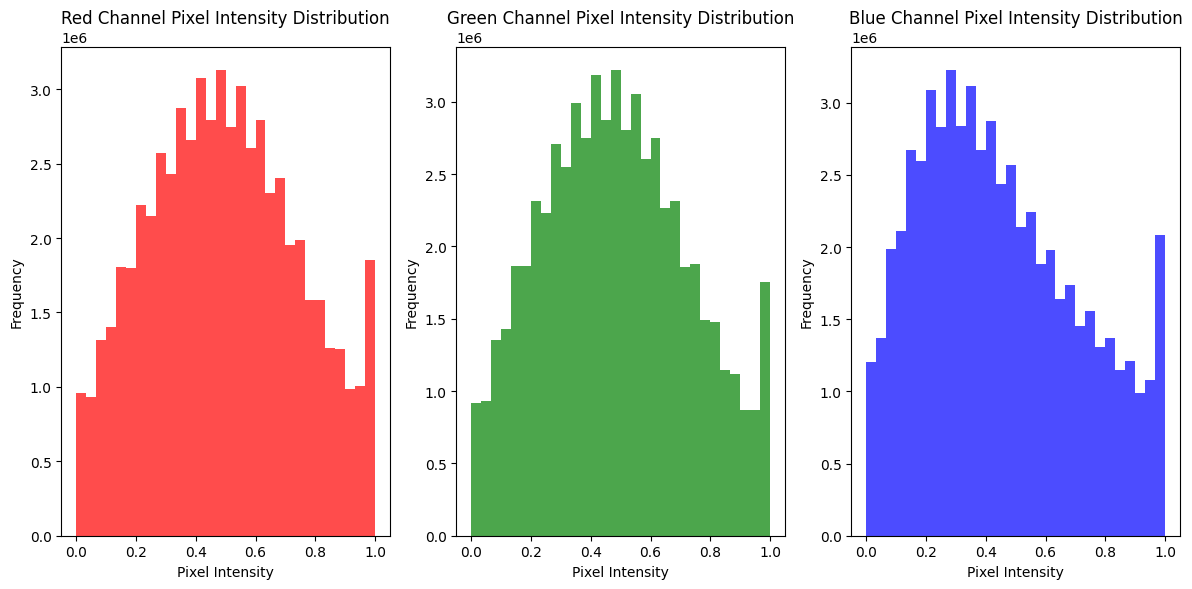

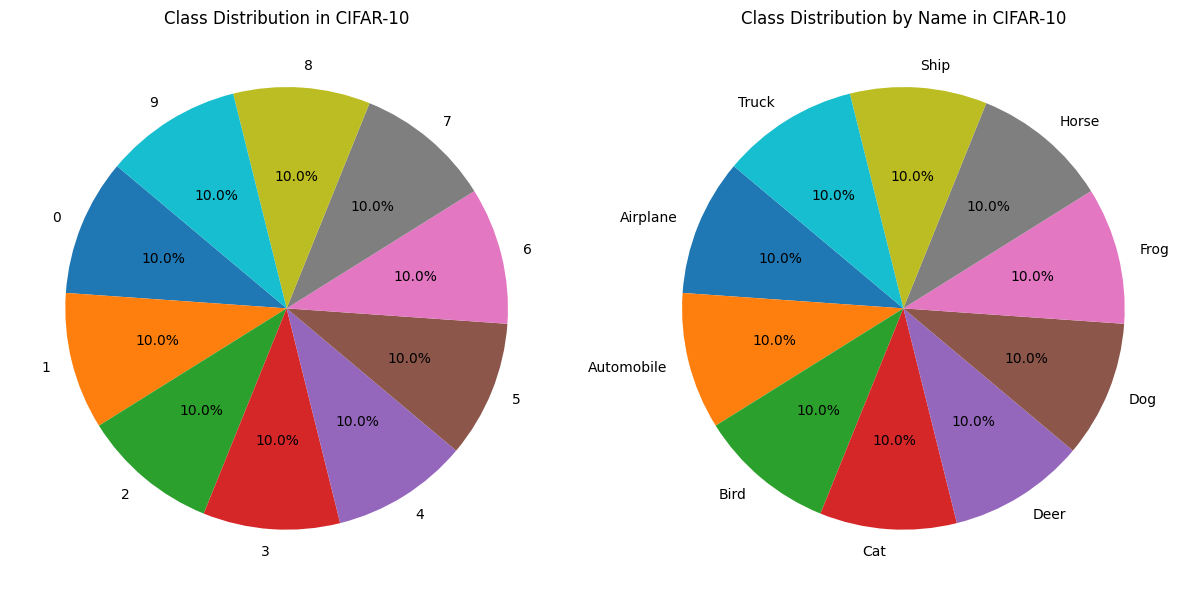

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine train and test data for analysis
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0).flatten()

# Normalize the image data
x_data = x_data.astype('float32') / 255.0

# Plotting histograms for pixel intensity distributions
def plot_pixel_intensity_histograms(images):
    plt.figure(figsize=(12, 6))

    # Flatten the images for histogram
    red_channel = images[:, :, :, 0].flatten()
    green_channel = images[:, :, :, 1].flatten()
    blue_channel = images[:, :, :, 2].flatten()

    plt.subplot(1, 3, 1)
    plt.hist(red_channel, bins=30, color='red', alpha=0.7)
    plt.title('Red Channel Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.hist(green_channel, bins=30, color='green', alpha=0.7)
    plt.title('Green Channel Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    plt.hist(blue_channel, bins=30, color='blue', alpha=0.7)
    plt.title('Blue Channel Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Plot histograms
plot_pixel_intensity_histograms(x_data)

# Plotting pie charts for class distribution
def plot_class_distribution_pie(labels):
    # Count the number of occurrences for each class
    class_counts = np.bincount(labels)

    plt.figure(figsize=(12, 6))

    # First Pie Chart
    plt.subplot(1, 2, 1)
    plt.pie(class_counts, labels=np.arange(10), autopct='%1.1f%%', startangle=140)
    plt.title('Class Distribution in CIFAR-10')

    # Second Pie Chart (with class names)
    plt.subplot(1, 2, 2)
    class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                   'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140)
    plt.title('Class Distribution by Name in CIFAR-10')

    plt.tight_layout()
    plt.show()

# Plot pie charts
plot_class_distribution_pie(y_data)


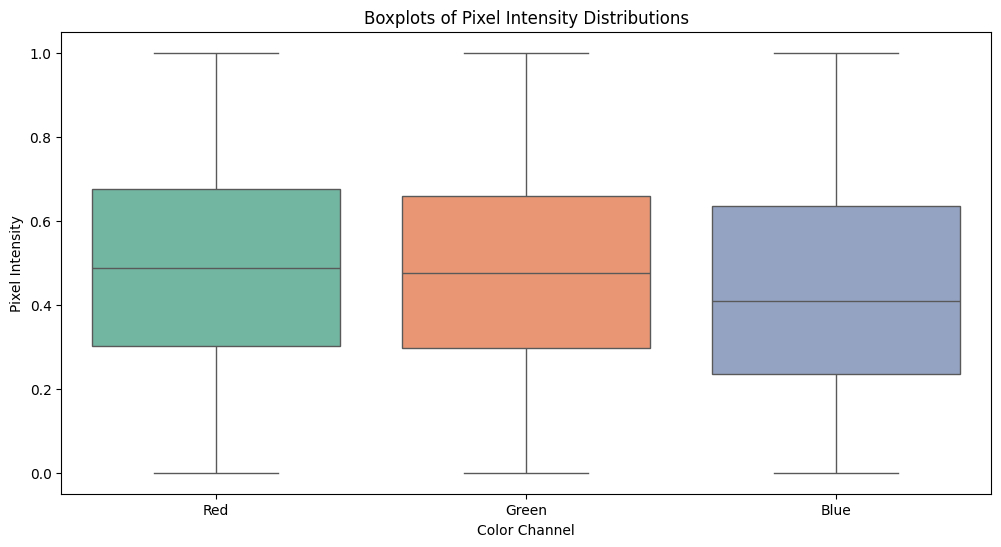

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine train and test data for analysis
x_data = np.concatenate((x_train, x_test), axis=0)

# Normalize the image data
x_data = x_data.astype('float32') / 255.0

# Function to plot pixel intensity boxplots
def plot_pixel_intensity_boxplots(images, sample_size=10000):
    plt.figure(figsize=(12, 6))

    # Sample a subset of the images for faster plotting
    indices = np.random.choice(images.shape[0], sample_size, replace=False)

    # Reshape the sampled image data for each color channel
    red_channel = images[indices, :, :, 0].flatten()
    green_channel = images[indices, :, :, 1].flatten()
    blue_channel = images[indices, :, :, 2].flatten()

    # Create a DataFrame for easier plotting
    data = {
        'Red': red_channel,
        'Green': green_channel,
        'Blue': blue_channel
    }

    # Convert to DataFrame for seaborn
    df = pd.DataFrame(data)

    # Create boxplots
    sns.boxplot(data=df, palette="Set2")
    plt.title('Boxplots of Pixel Intensity Distributions')
    plt.ylabel('Pixel Intensity')
    plt.xlabel('Color Channel')
    plt.xticks(ticks=np.arange(3), labels=['Red', 'Green', 'Blue'])
    plt.show()

# Plot boxplots
plot_pixel_intensity_boxplots(x_data)


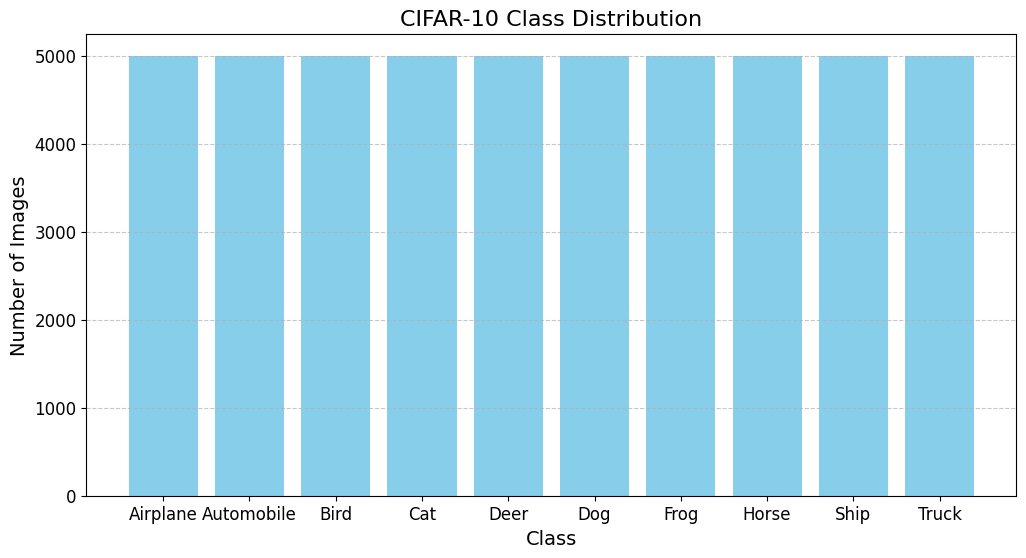

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Count the number of images per class in the training set
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Plotting the class distribution
plt.figure(figsize=(12, 6))  
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('CIFAR-10 Class Distribution', fontsize=16)
plt.xticks(range(10), ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


170498071/170498071 [==============================] - 96s 1us/step


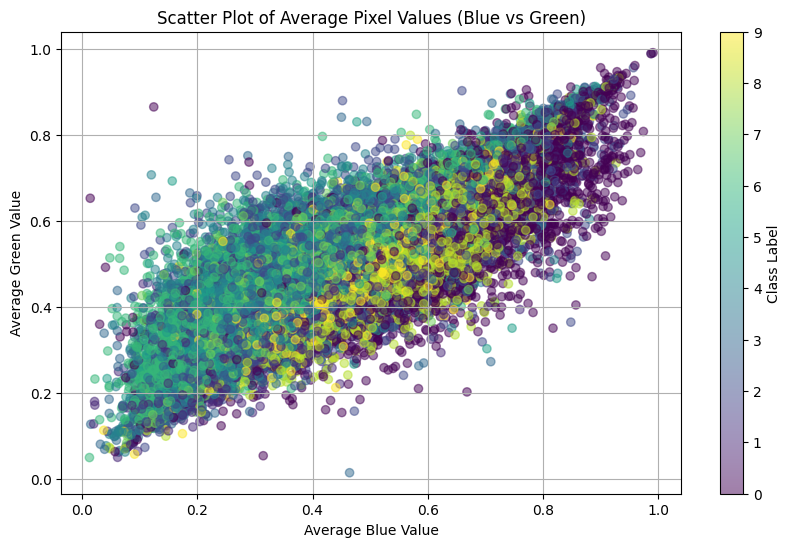

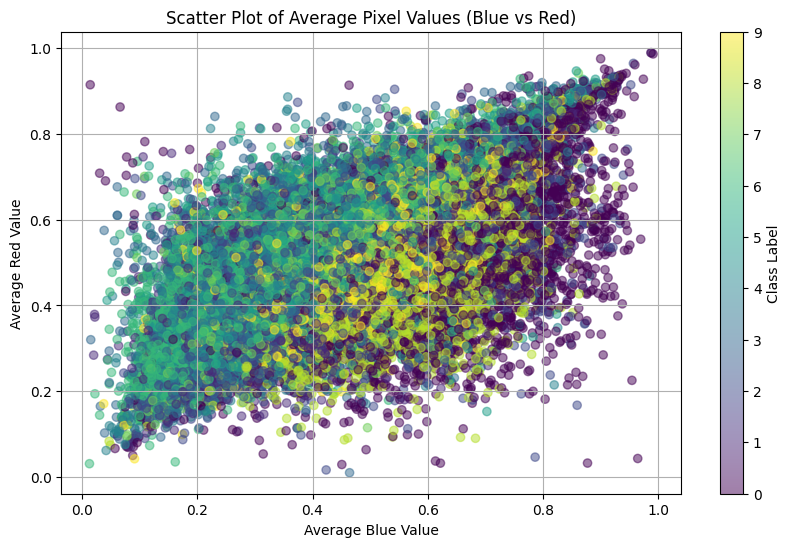

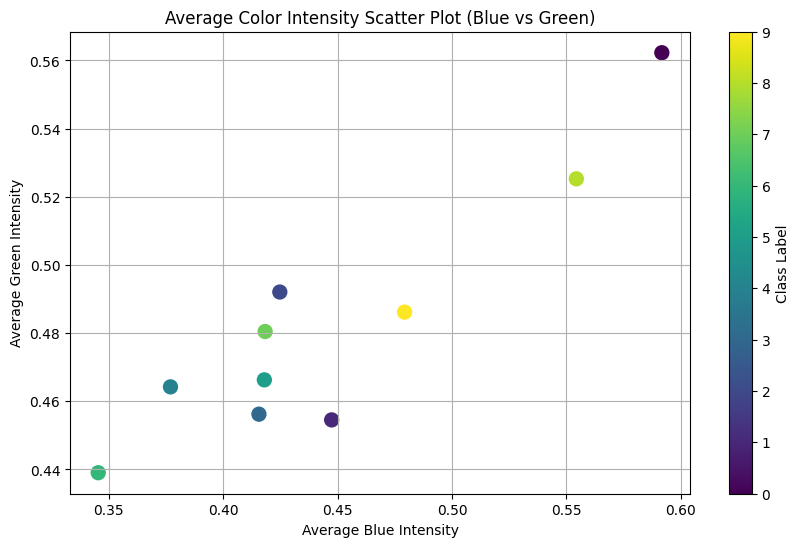

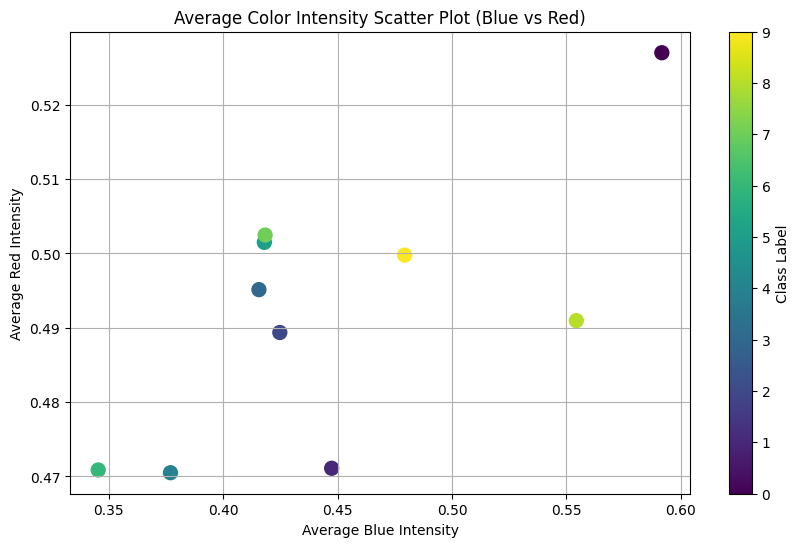

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine train and test data for analysis
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0).flatten()

# Normalize the image data
x_data = x_data.astype('float32') / 255.0

# Reshape data for analysis
n_samples = x_data.shape[0]
x_data_flattened = x_data.reshape(n_samples, -1)

# 1. Scatter Plot of Average Pixel Values (Blue vs Green)
def plot_blue_vs_green(images, labels):
    avg_blue = images.mean(axis=(1, 2))[:, 2]
    avg_green = images.mean(axis=(1, 2))[:, 1]
    
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(avg_blue, avg_green, c=labels, cmap='viridis', alpha=0.5)
    plt.title('Scatter Plot of Average Pixel Values (Blue vs Green)')
    plt.xlabel('Average Blue Value')
    plt.ylabel('Average Green Value')
    plt.colorbar(scatter, label='Class Label', ticks=np.arange(10))
    plt.grid()
    plt.show()

# 2. Scatter Plot of Average Pixel Values (Blue vs Red)
def plot_blue_vs_red(images, labels):
    avg_blue = images.mean(axis=(1, 2))[:, 2]
    avg_red = images.mean(axis=(1, 2))[:, 0]
    
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(avg_blue, avg_red, c=labels, cmap='viridis', alpha=0.5)
    plt.title('Scatter Plot of Average Pixel Values (Blue vs Red)')
    plt.xlabel('Average Blue Value')
    plt.ylabel('Average Red Value')
    plt.colorbar(scatter, label='Class Label', ticks=np.arange(10))
    plt.grid()
    plt.show()

# Plot Blue vs Green
plot_blue_vs_green(x_data, y_data)

# Plot Blue vs Red
plot_blue_vs_red(x_data, y_data)

# 3. Scatter Plot of Color Intensities by Class (Blue vs Green)
def plot_blue_vs_green_by_class(images, labels):
    avg_colors = np.array([images[labels == cls].mean(axis=(0, 1, 2)) for cls in range(10)])
    
    plt.figure(figsize=(10, 6))
    plt.scatter(avg_colors[:, 2], avg_colors[:, 1], c=range(10), cmap='viridis', s=100)
    plt.title('Average Color Intensity Scatter Plot (Blue vs Green)')
    plt.xlabel('Average Blue Intensity')
    plt.ylabel('Average Green Intensity')
    plt.colorbar(label='Class Label', ticks=np.arange(10))
    plt.grid()
    plt.show()

# 4. Scatter Plot of Color Intensities by Class (Blue vs Red)
def plot_blue_vs_red_by_class(images, labels):
    avg_colors = np.array([images[labels == cls].mean(axis=(0, 1, 2)) for cls in range(10)])
    
    plt.figure(figsize=(10, 6))
    plt.scatter(avg_colors[:, 2], avg_colors[:, 0], c=range(10), cmap='viridis', s=100)
    plt.title('Average Color Intensity Scatter Plot (Blue vs Red)')
    plt.xlabel('Average Blue Intensity')
    plt.ylabel('Average Red Intensity')
    plt.colorbar(label='Class Label', ticks=np.arange(10))
    plt.grid()
    plt.show()

# Plot Blue vs Green by Class
plot_blue_vs_green_by_class(x_data, y_data)

# Plot Blue vs Red by Class
plot_blue_vs_red_by_class(x_data, y_data)


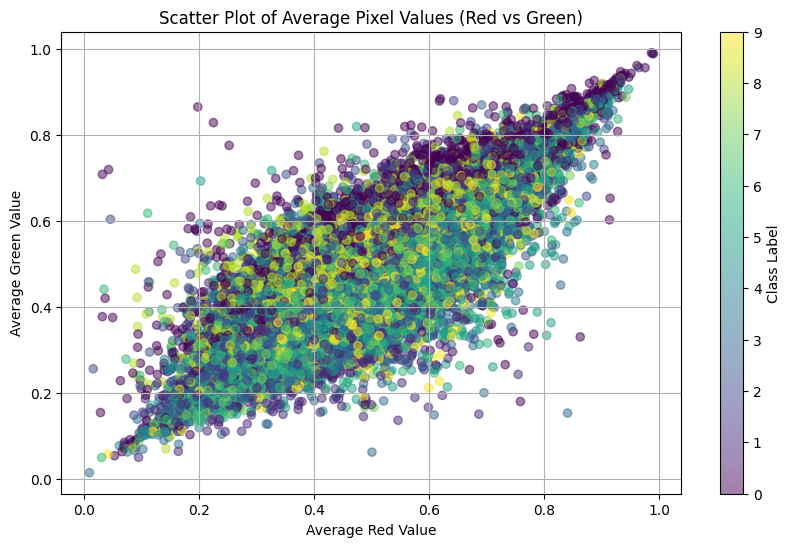

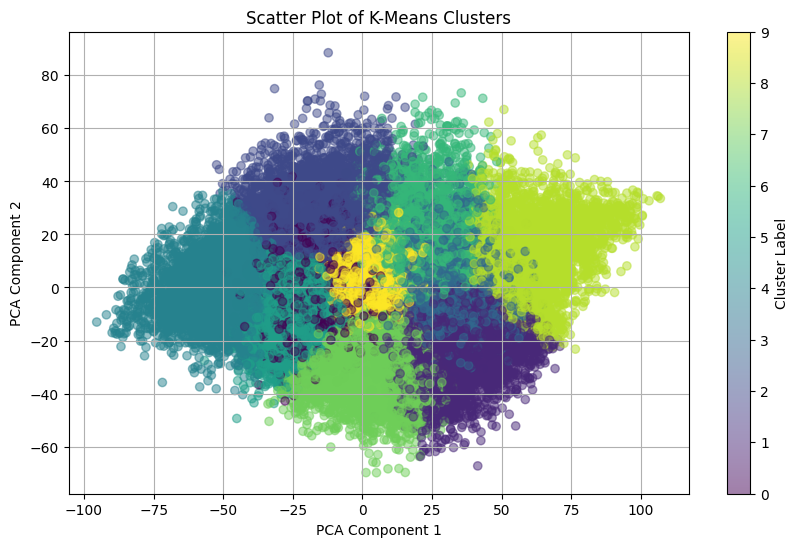

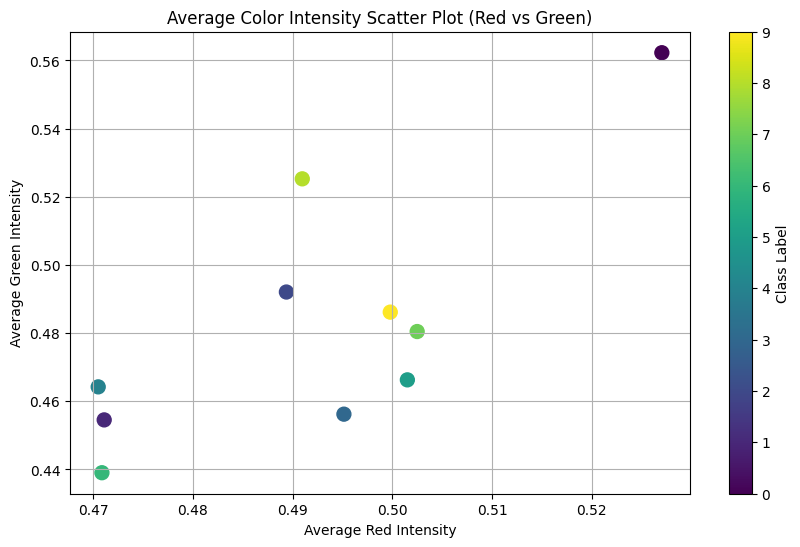

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine train and test data for analysis
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0).flatten()

# Normalize the image data
x_data = x_data.astype('float32') / 255.0

# Reshape data for analysis
n_samples = x_data.shape[0]
x_data_flattened = x_data.reshape(n_samples, -1)

# 1. Scatter Plot of Average Pixel Values (Red vs Green)
def plot_average_pixel_scatter(images, labels):
    avg_red = images.mean(axis=(1, 2))[:, 0]
    avg_green = images.mean(axis=(1, 2))[:, 1]
    
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(avg_red, avg_green, c=labels, cmap='viridis', alpha=0.5)
    plt.title('Scatter Plot of Average Pixel Values (Red vs Green)')
    plt.xlabel('Average Red Value')
    plt.ylabel('Average Green Value')
    plt.colorbar(scatter, label='Class Label', ticks=np.arange(10))
    plt.grid()
    plt.show()

# Plot Average Pixel Values
plot_average_pixel_scatter(x_data, y_data)

# 2. Scatter Plot of Clustered Data
n_clusters = 10  # Number of clusters
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data_flattened)

# Run K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(x_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot of K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

# 3. Scatter Plot of Color Intensities by Class
def plot_color_intensity_scatter(images, labels):
    avg_colors = np.array([images[labels == cls].mean(axis=(0, 1, 2)) for cls in range(10)])
    
    plt.figure(figsize=(10, 6))
    plt.scatter(avg_colors[:, 0], avg_colors[:, 1], c=range(10), cmap='viridis', s=100)
    plt.title('Average Color Intensity Scatter Plot (Red vs Green)')
    plt.xlabel('Average Red Intensity')
    plt.ylabel('Average Green Intensity')
    plt.colorbar(label='Class Label', ticks=np.arange(10))
    plt.grid()
    plt.show()

# Plot Average Color Intensities by Class
plot_color_intensity_scatter(x_data, y_data)


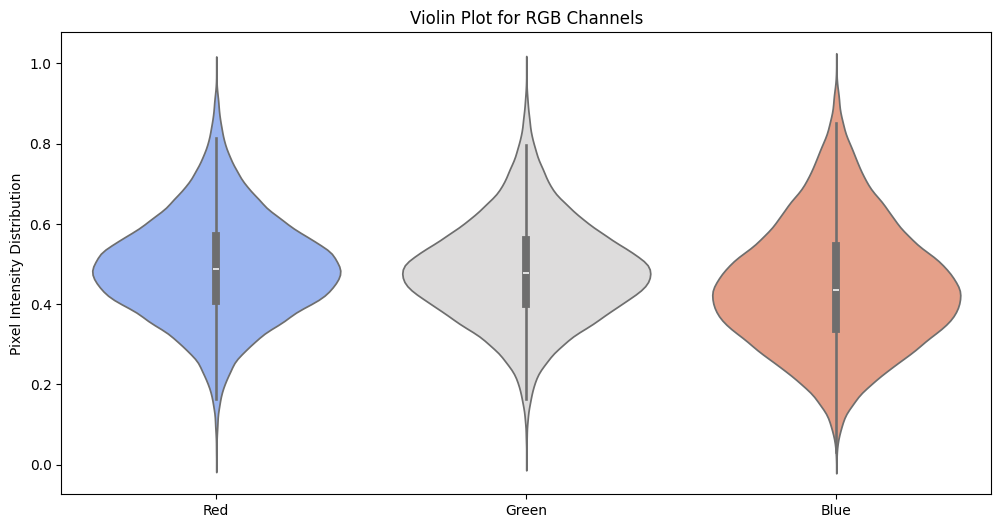

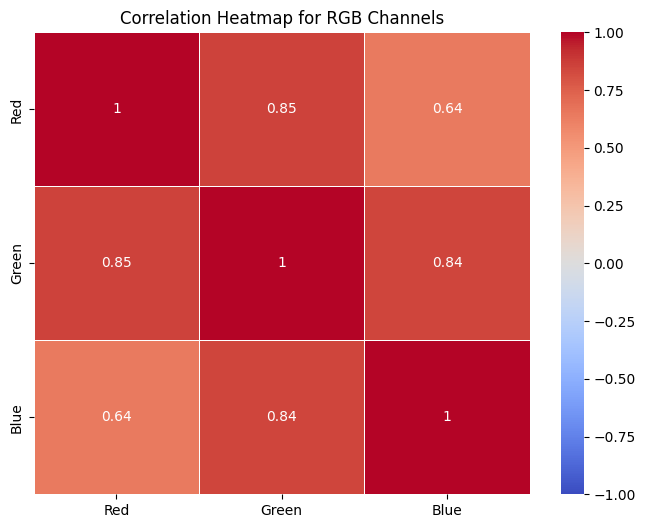

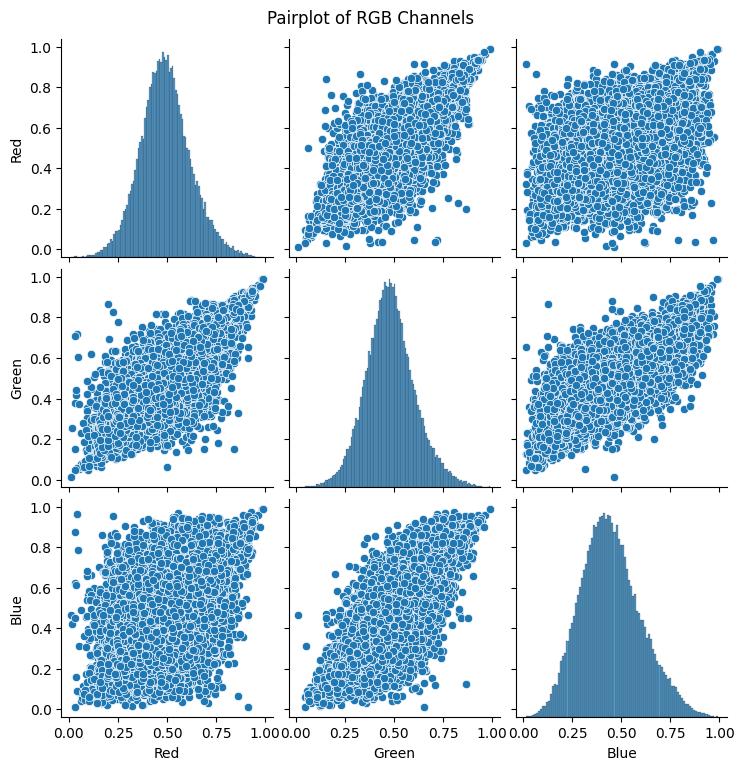

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine train and test data for analysis
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0).flatten()

# Normalize the image data
x_data = x_data.astype('float32') / 255.0

# Reshape data to isolate color channels
n_samples = x_data.shape[0]
red_channel = x_data[:, :, :, 0].reshape(n_samples, -1).mean(axis=1)
green_channel = x_data[:, :, :, 1].reshape(n_samples, -1).mean(axis=1)
blue_channel = x_data[:, :, :, 2].reshape(n_samples, -1).mean(axis=1)

# Create a DataFrame for visualization
import pandas as pd
df = pd.DataFrame({
    'Red': red_channel,
    'Green': green_channel,
    'Blue': blue_channel,
    'Label': y_data
})

# 1. Violin Plots for RGB channels
def plot_violin_plots(data):
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=data[['Red', 'Green', 'Blue']], palette='coolwarm')
    plt.title('Violin Plot for RGB Channels')
    plt.ylabel('Pixel Intensity Distribution')
    plt.show()

# 2. Correlation Heatmap
def plot_correlation_heatmap(data):
    correlation_matrix = data[['Red', 'Green', 'Blue']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
    plt.title('Correlation Heatmap for RGB Channels')
    plt.show()

# 3. Pairplot to visualize relationships between RGB channels
def plot_pairplot(data):
    sns.pairplot(data[['Red', 'Green', 'Blue']])
    plt.suptitle('Pairplot of RGB Channels', y=1.02)
    plt.show()

# Call the plotting functions
plot_violin_plots(df)
plot_correlation_heatmap(df)
plot_pairplot(df)


Random Forest Accuracy: 0.42


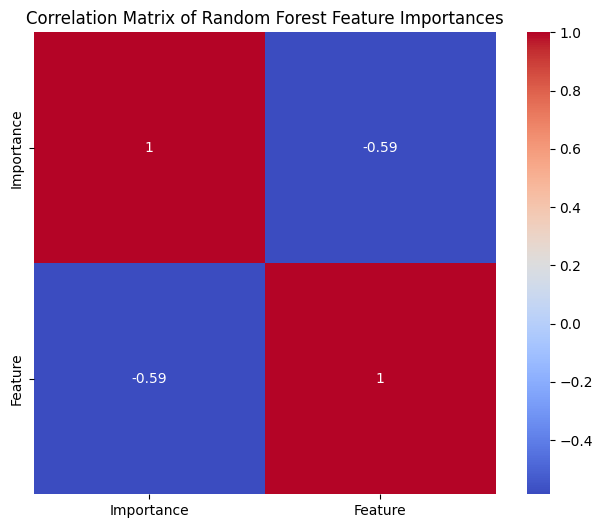

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine train and test data
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0).flatten()

# Normalize the image data
x_data = x_data.astype('float32') / 255.0

# Reshape the data into 2D (samples, features)
n_samples = x_data.shape[0]
x_data_flattened = x_data.reshape(n_samples, -1)  # Flatten the images

# Split data into training and testing sets
x_train_flat, x_test_flat, y_train_flat, y_test_flat = train_test_split(x_data_flattened, y_data, test_size=0.2, random_state=42)

# Dimensionality Reduction using PCA
pca = PCA(n_components=100)  # Reduction to 100 features to speed up training
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)  # Use all cores, fewer trees for speed
rf.fit(x_train_pca, y_train_flat)

# Predict on the test data
y_pred_rf = rf.predict(x_test_pca)

# Accuracy
accuracy = accuracy_score(y_test_flat, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy:.2f}")

# Step 2: Get Feature Importances
importances = rf.feature_importances_

# Step 3: Plot Correlation Matrix based on Feature Importances
# Create a DataFrame for the feature importances
importances_df = pd.DataFrame(importances, columns=['Importance'])
importances_df['Feature'] = np.arange(len(importances_df))  # Create a feature index for plotting

# Compute correlations
corr_matrix = importances_df.corr()

# Plot Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Matrix of Random Forest Feature Importances")
plt.show()


Naive Bayes Accuracy: 0.34


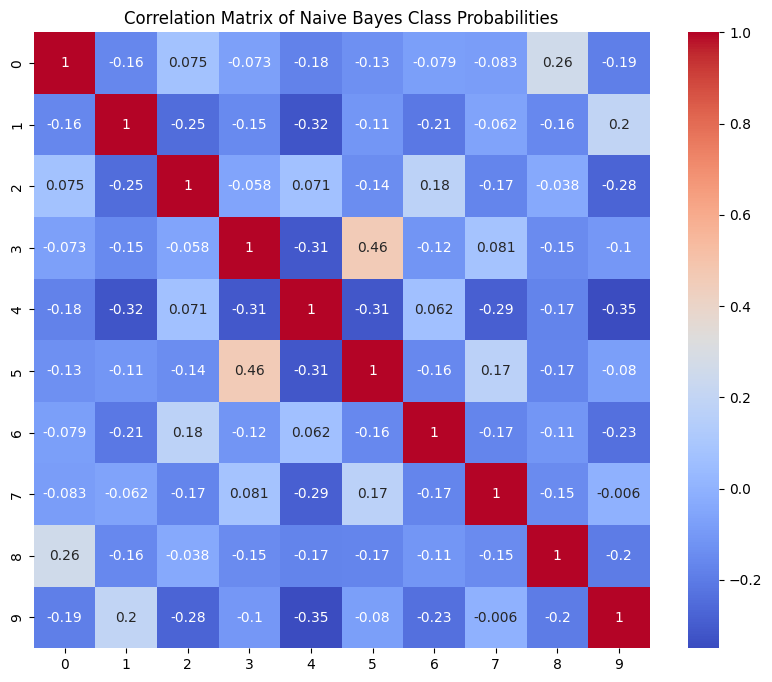

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine train and test data
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0).flatten()

# Normalize the image data
x_data = x_data.astype('float32') / 255.0

# Reshape the data into 2D (samples, features)
n_samples = x_data.shape[0]
x_data_flattened = x_data.reshape(n_samples, -1)  # Flatten the images

# Split data into training and testing sets
x_train_flat, x_test_flat, y_train_flat, y_test_flat = train_test_split(x_data_flattened, y_data, test_size=0.2, random_state=42)

# Dimensionality Reduction using PCA
pca = PCA(n_components=100)  # Reduce to 100 features for speed
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# Train Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(x_train_pca, y_train_flat)

# Predict on the test data
y_pred_nb = gnb.predict(x_test_pca)

# Accuracy
accuracy = accuracy_score(y_test_flat, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy:.2f}")

# Step 2: Get Class Probabilities
class_probs = gnb.predict_proba(x_test_pca)

# Step 3: Plot Correlation Matrix based on Class Probabilities
class_probs_df = pd.DataFrame(class_probs, columns=np.unique(y_data))  # Create a DataFrame for class probabilities

# Compute correlations
corr_matrix = class_probs_df.corr()

# Plot Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Matrix of Naive Bayes Class Probabilities")
plt.show()


Decision Tree Accuracy: 0.31


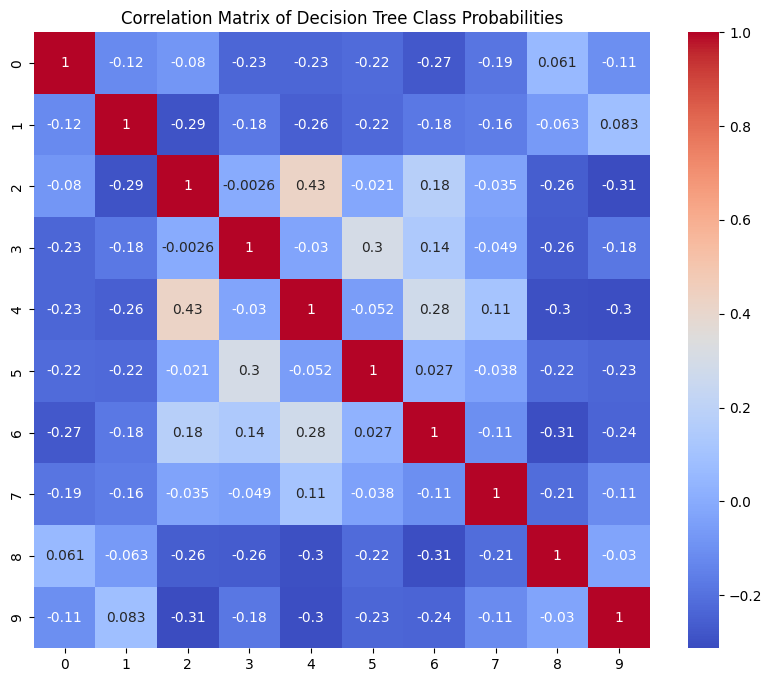

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine train and test data
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0).flatten()

# Normalize the image data
x_data = x_data.astype('float32') / 255.0

# Reshape the data into 2D (samples, features)
n_samples = x_data.shape[0]
x_data_flattened = x_data.reshape(n_samples, -1)  # Flatten the images

# Split data into training and testing sets
x_train_flat, x_test_flat, y_train_flat, y_test_flat = train_test_split(x_data_flattened, y_data, test_size=0.2, random_state=42)

# Dimensionality Reduction using PCA
pca = PCA(n_components=50)  # Reduced to 50 components for speed
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# Train Decision Tree Classifier with limited depth
dt = DecisionTreeClassifier(max_depth=10, random_state=42)  # Limit depth to 10
dt.fit(x_train_pca, y_train_flat)

# Predict on the test data
y_pred_dt = dt.predict(x_test_pca)

# Accuracy
accuracy = accuracy_score(y_test_flat, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# Step 2: Get Class Probabilities
class_probs = dt.predict_proba(x_test_pca)

# Step 3: Plot Correlation Matrix based on Class Probabilities
class_probs_df = pd.DataFrame(class_probs, columns=np.unique(y_data))  # Create a DataFrame for class probabilities

# Compute correlations
corr_matrix = class_probs_df.corr()

# Plot Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Matrix of Decision Tree Class Probabilities")
plt.show()


Ensemble Learning Accuracy: 0.31


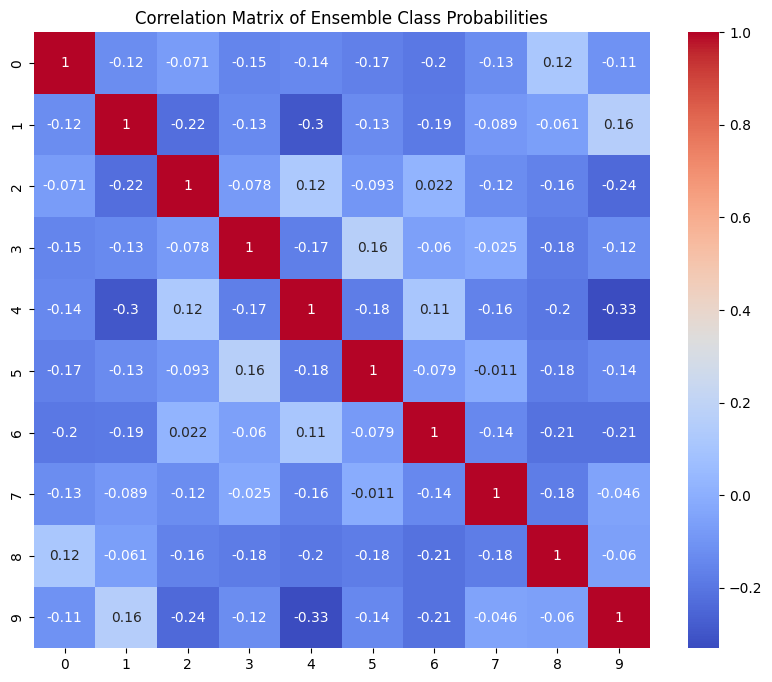

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine train and test data
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0).flatten()

# Normalize the image data
x_data = x_data.astype('float32') / 255.0

# Reshape the data into 2D (samples, features)
n_samples = x_data.shape[0]
x_data_flattened = x_data.reshape(n_samples, -1)

# Split data into training and testing sets
x_train_flat, x_test_flat, y_train_flat, y_test_flat = train_test_split(x_data_flattened, y_data, test_size=0.2, random_state=42)

# Dimensionality Reduction using PCA
pca = PCA(n_components=100)  # Reduce to 100 features for speed
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# Initialize the individual classifiers
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
nb = GaussianNB()

# Create an ensemble of the classifiers using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', dt),
    ('random_forest', rf),
    ('naive_bayes', nb)],
    voting='soft')  # Soft voting to use predicted probabilities

# Train the ensemble model
ensemble_model.fit(x_train_pca, y_train_flat)

# Predict on the test data
y_pred_ensemble = ensemble_model.predict(x_test_pca)

# Accuracy
accuracy = accuracy_score(y_test_flat, y_pred_ensemble)
print(f"Ensemble Learning Accuracy: {accuracy:.2f}")

# Step 2: Get Class Probabilities
class_probs = ensemble_model.predict_proba(x_test_pca)

# Step 3: Plot Correlation Matrix based on Class Probabilities
class_probs_df = pd.DataFrame(class_probs, columns=np.unique(y_data))  # Create a DataFrame for class probabilities

# Compute correlations
corr_matrix = class_probs_df.corr()

# Plot Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Matrix of Ensemble Class Probabilities")
plt.show()


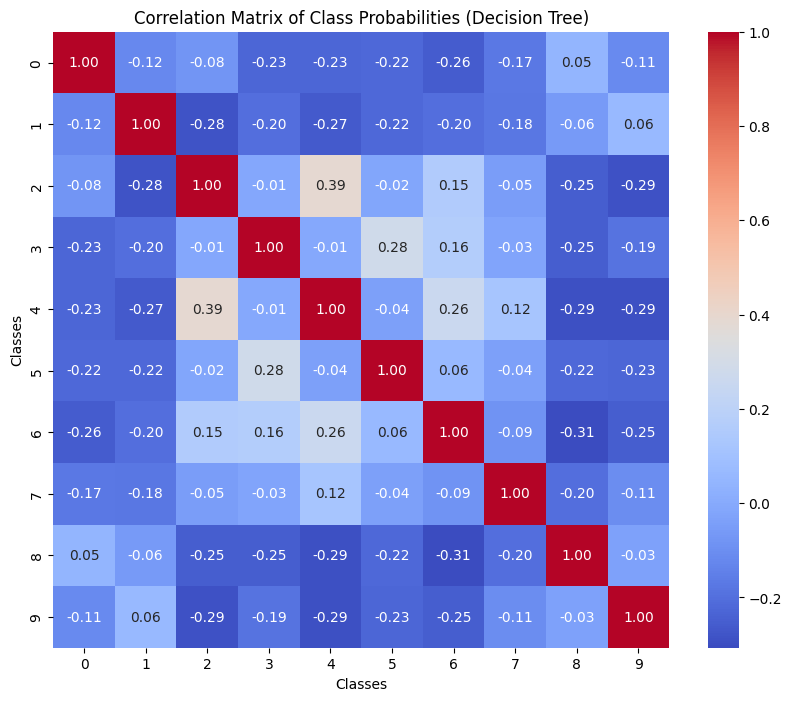

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine train and test data and normalize
x_data = np.concatenate((x_train, x_test)).astype('float32') / 255.0
y_data = np.concatenate((y_train, y_test)).flatten()

# Reshape the data into 2D (samples, features)
n_samples = x_data.shape[0]
x_data_flattened = x_data.reshape(n_samples, -1)

# Split data into training and testing sets
x_train_flat, x_test_flat, y_train_flat, y_test_flat = train_test_split(x_data_flattened, y_data, test_size=0.2, random_state=42)

# Dimensionality Reduction using PCA
pca = PCA(n_components=100)  # Reduce to 100 features for speed
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# Train Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
decision_tree.fit(x_train_pca, y_train_flat)

# Get class probabilities
class_probs = decision_tree.predict_proba(x_test_pca)

# Create DataFrame for class probabilities
class_probs_df = pd.DataFrame(class_probs, columns=np.unique(y_data))  # DataFrame for class probabilities

# Compute correlations for all classes
corr_matrix = class_probs_df.corr()

# Plot the correlation matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, square=True, fmt=".2f")  # Display float values
plt.title("Correlation Matrix of Class Probabilities (Decision Tree)")
plt.xlabel("Classes")
plt.ylabel("Classes")
plt.show()


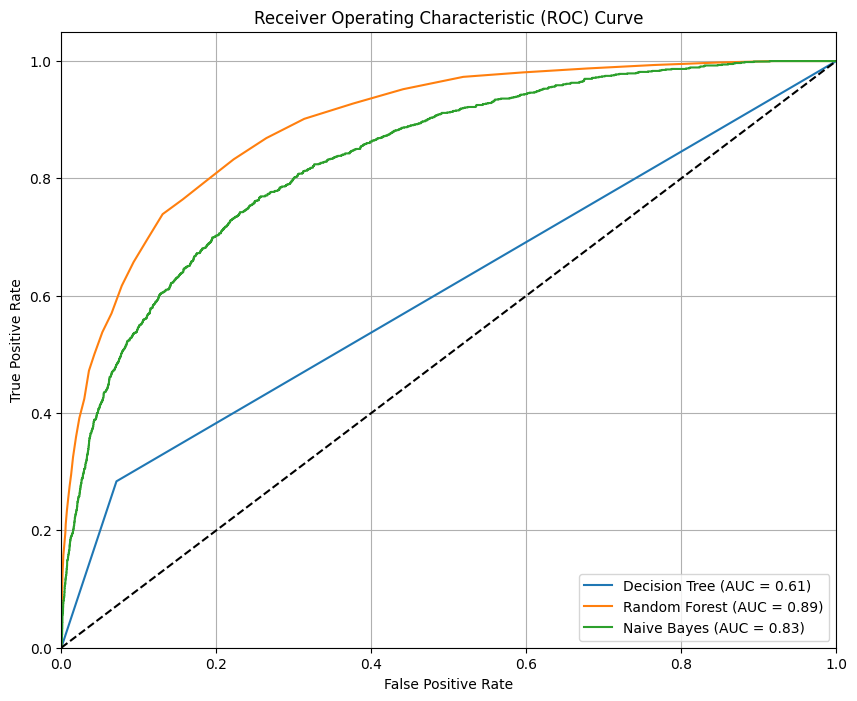

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine train and test data and normalize
x_data = np.concatenate((x_train, x_test)).astype('float32') / 255.0
y_data = np.concatenate((y_train, y_test)).flatten()

# Reshape the data into 2D (samples, features)
n_samples = x_data.shape[0]
x_data_flattened = x_data.reshape(n_samples, -1)

# Split data into training and testing sets
x_train_flat, x_test_flat, y_train_flat, y_test_flat = train_test_split(x_data_flattened, y_data, test_size=0.2, random_state=42)

# Dimensionality Reduction using PCA
pca = PCA(n_components=100)  # Reduce to 100 features for speed
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# Initialize classifiers
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
nb = GaussianNB()

# Train classifiers
classifiers = {'Decision Tree': dt, 'Random Forest': rf, 'Naive Bayes': nb}
for name, clf in classifiers.items():
    clf.fit(x_train_pca, y_train_flat)

# Prepare for ROC plotting
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    # Get predicted probabilities
    y_prob = clf.predict_proba(x_test_pca)

    # Calculate ROC curve and AUC for each class (use class 1 as positive)
    fpr, tpr, _ = roc_curve(y_test_flat, y_prob[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot details
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine train and test data and normalize
x_data = np.concatenate((x_train, x_test)).astype('float32') / 255.0
y_data = np.concatenate((y_train, y_test)).flatten()

# Reshape the data into 2D (samples, features)
n_samples = x_data.shape[0]
x_data_flattened = x_data.reshape(n_samples, -1)

# Split data into training and testing sets
x_train_flat, x_test_flat, y_train_flat, y_test_flat = train_test_split(x_data_flattened, y_data, test_size=0.2, random_state=42)

# Dimensionality Reduction using PCA
pca = PCA(n_components=100)  # Reduce to 100 features for speed
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# Initialize models
decision_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
naive_bayes = GaussianNB()

# Ensemble Model (Voting Classifier)
ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('naive_bayes', naive_bayes)
], voting='soft')  # Soft voting uses predicted probabilities

# Train all models
decision_tree.fit(x_train_pca, y_train_flat)
random_forest.fit(x_train_pca, y_train_flat)
naive_bayes.fit(x_train_pca, y_train_flat)
ensemble_model.fit(x_train_pca, y_train_flat)

# Predict on the test data
y_pred_dt = decision_tree.predict(x_test_pca)
y_pred_rf = random_forest.predict(x_test_pca)
y_pred_nb = naive_bayes.predict(x_test_pca)
y_pred_ensemble = ensemble_model.predict(x_test_pca)

# Step 2: Accuracy scores for each model
print(f"Decision Tree Accuracy: {accuracy_score(y_test_flat, y_pred_dt):.2f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test_flat, y_pred_rf):.2f}")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test_flat, y_pred_nb):.2f}")
print(f"Ensemble Model Accuracy: {accuracy_score(y_test_flat, y_pred_ensemble):.2f}")

# Step 3: Classification reports
print("\nDecision Tree Classification Report:")
print(classification_report(y_test_flat, y_pred_dt))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test_flat, y_pred_rf))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test_flat, y_pred_nb))

print("\nEnsemble Learning Classification Report:")
print(classification_report(y_test_flat, y_pred_ensemble))


Decision Tree Accuracy: 0.31
Random Forest Accuracy: 0.45
Naive Bayes Accuracy: 0.34
Ensemble Model Accuracy: 0.38

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.38      0.40      1181
           1       0.35      0.31      0.33      1188
           2       0.30      0.21      0.25      1232
           3       0.21      0.24      0.23      1274
           4       0.26      0.31      0.28      1179
           5       0.29      0.21      0.24      1230
           6       0.25      0.40      0.30      1123
           7       0.30      0.25      0.27      1217
           8       0.42      0.43      0.42      1189
           9       0.33      0.35      0.34      1187

    accuracy                           0.31     12000
   macro avg       0.31      0.31      0.31     12000
weighted avg       0.31      0.31      0.31     12000


Random Forest Classification Report:
              precision    recall  f1-score   supp